In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.style.use("ggplot")
sns.set(style="whitegrid",font_scale=1.2)

In [2]:
%cd E:\DataScience\Datasets\Richter's Predictor Dataset

E:\DataScience\Datasets\Richter's Predictor Dataset


In [3]:
train_data = pd.read_csv("train_values.csv")
train_labels = pd.read_csv("train_labels.csv")
train_dataset = pd.merge(train_data,train_labels,on = "building_id")
train_dataset.shape

(260601, 40)

In [4]:
train_dataset.drop(columns=["building_id"],inplace=True)
train_dataset.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,2
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3


### Checking for Nulls ==> No Nulls are observed in training data

In [5]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-null 

 ### Identifying categorical and continuous variables in the dataset

In [6]:
cat_feat = []
cont_feat = []
for i in train_dataset.columns:
    if len(train_dataset[i].unique()) > 15: cont_feat.append(i)
    else: cat_feat.append(i)

print("Categorical Features are:\n{} \nContinuous Features are:\n{}"
      .format("\n".join(cat_feat)+"\n","\n".join(cont_feat )))

Categorical Features are:
count_floors_pre_eq
land_surface_condition
foundation_type
roof_type
ground_floor_type
other_floor_type
position
plan_configuration
has_superstructure_adobe_mud
has_superstructure_mud_mortar_stone
has_superstructure_stone_flag
has_superstructure_cement_mortar_stone
has_superstructure_mud_mortar_brick
has_superstructure_cement_mortar_brick
has_superstructure_timber
has_superstructure_bamboo
has_superstructure_rc_non_engineered
has_superstructure_rc_engineered
has_superstructure_other
legal_ownership_status
count_families
has_secondary_use
has_secondary_use_agriculture
has_secondary_use_hotel
has_secondary_use_rental
has_secondary_use_institution
has_secondary_use_school
has_secondary_use_industry
has_secondary_use_health_post
has_secondary_use_gov_office
has_secondary_use_use_police
has_secondary_use_other
damage_grade
 
Continuous Features are:
geo_level_1_id
geo_level_2_id
geo_level_3_id
age
area_percentage
height_percentage


### Lets look at the target variable

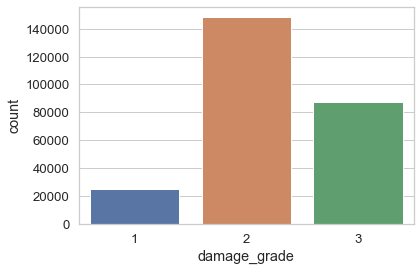

In [7]:
sns.countplot(x="damage_grade",data=train_dataset);

#class imbalances exist.Smote might be needed for better prediction

### Univariate Analysis - Continuous Features

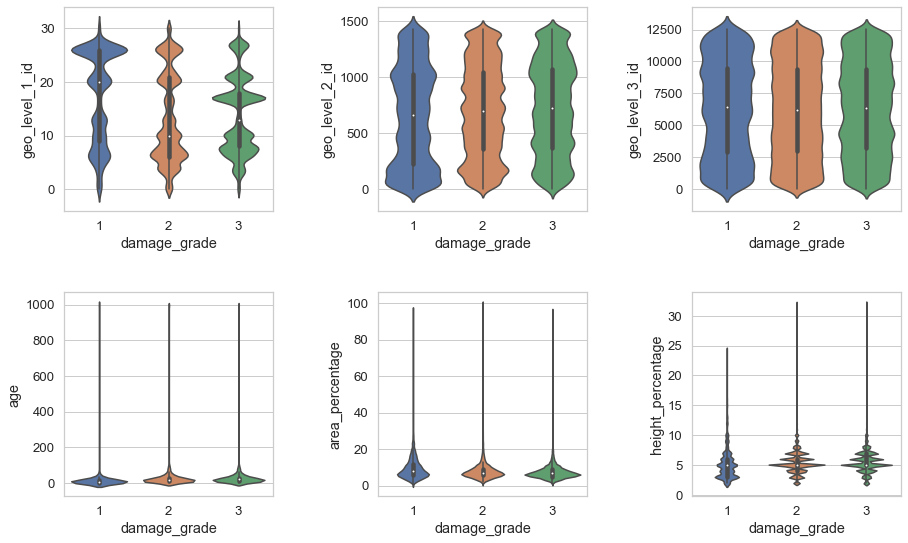

In [8]:
cont_zip = list(zip([0,0,0,1,1,1],[0,1,2]*2,cont_feat))
f, axes = plt.subplots(2, 3,figsize=(15, 9))
f.subplots_adjust(wspace=0.5,hspace=0.4)
   
for _,item in enumerate(cont_zip):
    sns.violinplot(x="damage_grade",y=item[2],data=train_dataset,ax= axes[item[0],item[1]],orient='v')    

geo_level_2_id and geo_level_3_id have almost uniform distributions while geo_level_1_id and rest have skewed data.Skewness in area_percentage, height_percentage can be reduced using log transformation

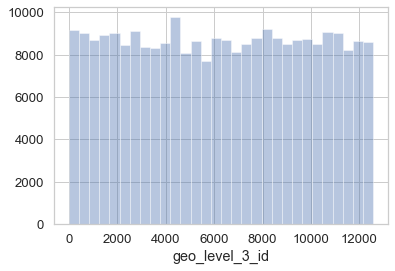

In [9]:
sns.distplot(train_dataset["geo_level_3_id"],bins=30,kde=False)
#sns.distplot(train_dataset[train_dataset["damage_grade"]==2]["geo_level_3_id"],bins=30,kde=False)
#sns.distplot(train_dataset[train_dataset["damage_grade"]==3]["geo_level_3_id"],bins=30,kde=False)
plt.show()
#Clearly several modes are present in the distribution - Hence Lets try to bin those with <15 and > 15 levels


### Correlation between continuous features

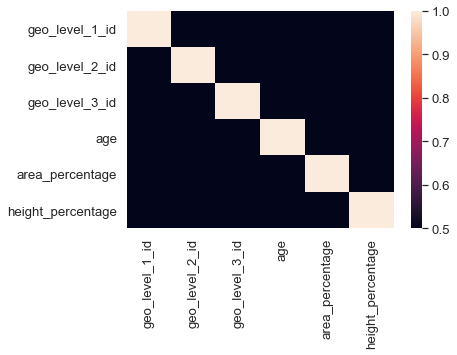

In [10]:
corr_df_cont = train_dataset[cont_feat].corr("spearman")
sns.heatmap(corr_df_cont,vmin=0.5)
# No significant positive correlation is seen

### Univariate Analysis - Categorical Features

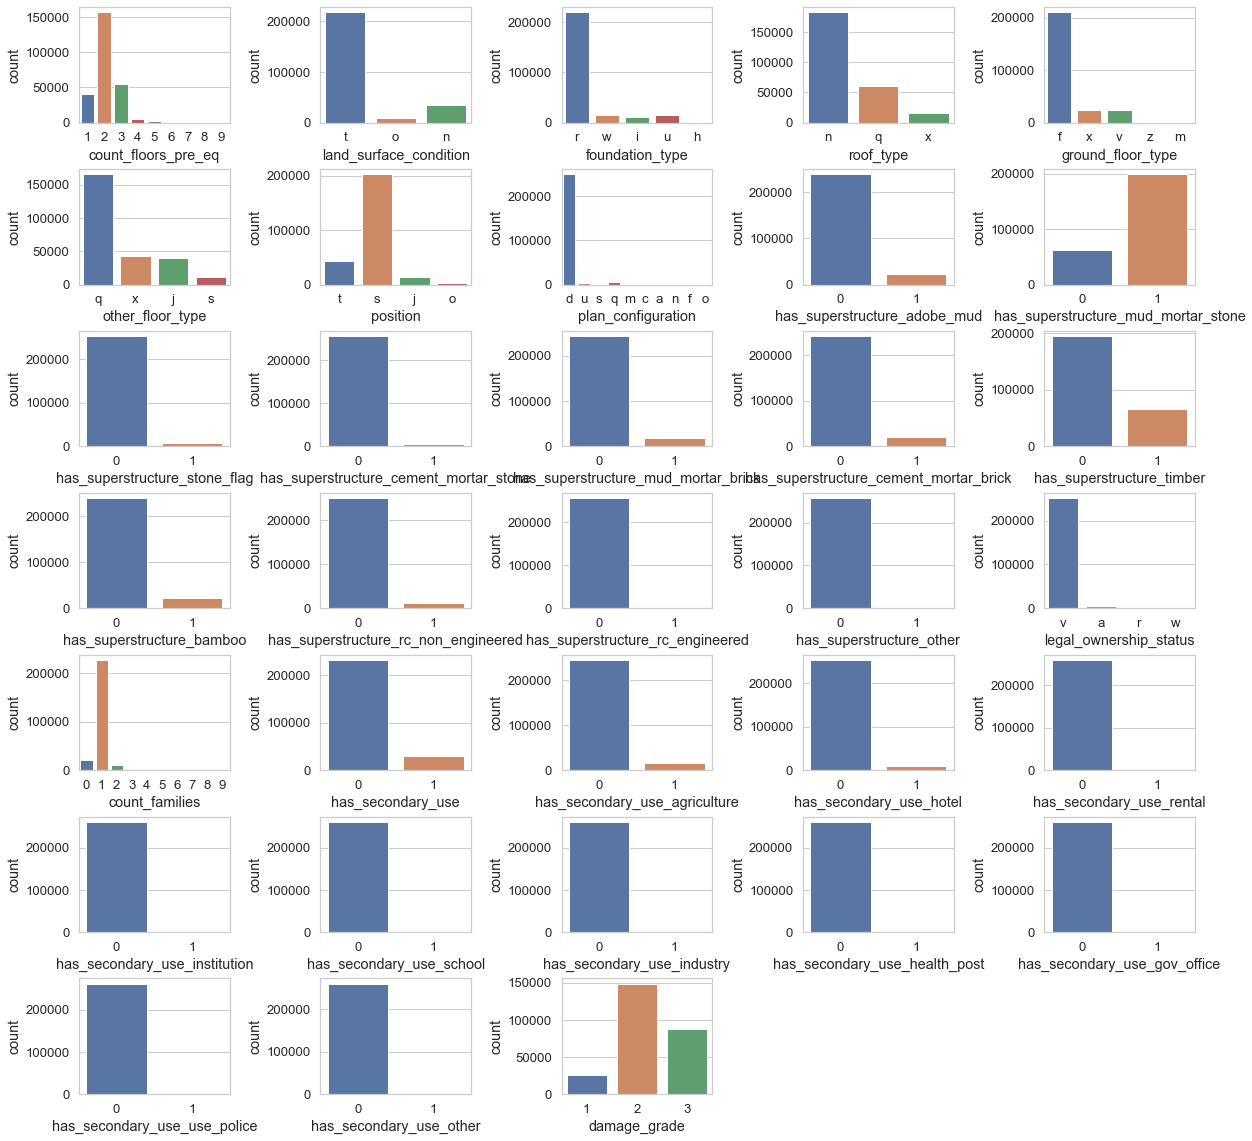

In [11]:
cat_zip = list(zip([0]*5+[1]*5+[2]*5+[3]*5+[4]*5+[5]*5+[6]*5,[0,1,2,3,4]*7,cat_feat))
f, axes = plt.subplots(7, 5,figsize=(20, 20))
f.subplots_adjust(wspace=0.6,hspace=0.4)
   
for _,item in enumerate(cat_zip):
    sns.countplot(x=item[2],data=train_dataset,ax= axes[item[0],item[1]])
f.delaxes(axes[6,3])
f.delaxes(axes[6,4])

#So many class imbalances exist.Lets identify them

#### Finding out features which have less than 1% class seperation

In [12]:
skewed_cat = []
for i in cat_feat:
    x = train_dataset[i].value_counts()
    x = (x/x.sum())*100
    y = [val for val in x if val < 1]
    if y:skewed_cat.append(i)

d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64


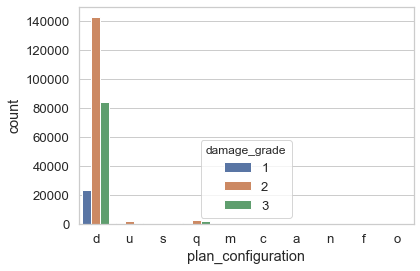

In [13]:
sns.countplot(x="plan_configuration",data=train_dataset,hue="damage_grade")
print(train_dataset["plan_configuration"].value_counts())

### Correlation between categorical Features

def cramers_corrected_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

cat_cor_df = pd.DataFrame(index=cat_feat)
for x in cat_feat:
    for i in cat_feat:
        cat_corr = cramers_corrected_stat(pd.crosstab(train_dataset.loc[:,x],train_dataset.loc[:,i]))
        cat_cor_df.loc[x,i]= cat_corr

plt.figure(figsize=(12,12))
sns.heatmap(cat_cor_df,vmin=0.5)

#No significant correlation is seen among features

In [14]:
binary_feat=[]
for i in cat_feat:
    if len(train_dataset[i].value_counts())==2: binary_feat.append(i)

        
train_dataset_ord = train_dataset.replace({"land_surface_condition" : {"t":3,"o":1,"n":2},
                                           "foundation_type" : {"h":1,"i":2,"u":3,"w":4,"r":5},
                                           "roof_type" : {"x":1,"q":2,"n":3},
                                           "ground_floor_type" : {"m":1,"z":2,"v":3,"x":4,"f":5},
                                           "other_floor_type" : {"s":1,"j":2,"x":3,"q":4},
                                           "position" : {"o":1,"j":2,"t":3,"s":4},
                                         "plan_configuration" : {"f":1,"n":1,"m":1,"o":2,"a":2,"c":2,"s":2,"u":3,"q":4,"d":5},
                                        #"plan_configuration" : {"f":1,"n":2,"m":3,"o":4,"a":5,"c":6,"s":7,"u":8,"q":9,"d":10}
                                         "legal_ownership_status" : {"r":1,"w":2,"a":3,"v":4}}
                                          )

ordinal_feat = [i for i in cat_feat if i not in binary_feat]
ordinal_feat

Leave_feat = ["land_surface_condition","foundation_type","roof_type","ground_floor_type","other_floor_type",
             "position","plan_configuration","legal_ownership_status"]

### Using Random Forest as Wrapper Method to identify Best Features

train_rf = train_dataset_ord.drop(labels="damage_grade",axis=1)
y_rf = train_dataset_ord["damage_grade"]

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=15,random_state=41,oob_score=True)
rfc.fit(train_rf,y_rf)

top_feature_columns = pd.Series(data=rfc.feature_importances_,index=train_rf.columns).sort_values(ascending=False)
plt.figure(figsize=(7,7))
sns.barplot(y=top_feature_columns.index[:20],x=top_feature_columns.values[:20],orient="h")

### Correlation between target and continuous variables

from sklearn.feature_selection import f_classif,chi2
from sklearn.feature_selection import SelectKBest

kbest = SelectKBest(chi2,k=10)
X_new = kbest.fit_transform(train_dataset_ord,y_rf)

print(kbest.get_support())
train_dataset_ord.columns

### Feature Engineering

In [15]:
'''
# Binning of geo_level_1_id
train_dataset_ord["geo_level_1_id"] = train_dataset_ord["geo_level_1_id"].apply(lambda x: 1 if x <= 15 else 2)
#sns.countplot(x="geo_level_1_id",data=train_dataset,hue="damage_grade")

#Binning of geo_level_2_id
def bin_geo_level_2(x):
    if x < 300: return 1
    elif x < 1300: return 2
    else: return 3
    
train_dataset_ord["geo_level_2_id"] = train_dataset_ord["geo_level_2_id"].apply(bin_geo_level_2)

train_dataset_ord["geo_level_3_id"] = train_dataset_ord["geo_level_3_id"].apply(lambda x: 1 if x <= 5000 else 2)
'''

# Binning of age
#sns.distplot(np.log(train_dataset[train_dataset["damage_grade"]==3]["age"]),bins=50,kde=False,hist=True)
def bin_age(x):
    if x < 40: return 1
    elif x < 120: return 2
    else: return 3
train_dataset_ord["age"] = train_dataset_ord["age"].apply(bin_age)

# Area Percentage
train_dataset_ord["area_percentage"] = train_dataset_ord["area_percentage"].apply(lambda x: np.log(1+x))

# Height Percentage
train_dataset_ord["height_percentage"] = train_dataset_ord["height_percentage"].apply(lambda x:np.log(1+x))

In [16]:

cont_feat_Eng = ['area_percentage', 'height_percentage']
onehot_feat_Eng = ["age","count_floors_pre_eq","count_families"]

te_feat = ["geo_level_1_id","geo_level_2_id","geo_level_3_id","age","count_floors_pre_eq","count_families"]


In [17]:
train_dataset_ord.drop(columns=["has_secondary_use"],inplace=True)
X = train_dataset_ord.drop(columns=["damage_grade"])
y = train_dataset_ord["damage_grade"]


In [18]:
print(onehot_feat_Eng)
X.shape


['age', 'count_floors_pre_eq', 'count_families']


(260601, 37)

In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from category_encoders import LeaveOneOutEncoder,TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,make_scorer
from imblearn.over_sampling import SMOTE

kf = KFold(n_splits=5)
sm = SMOTE()
#column_trans = ColumnTransformer([("ohe",OneHotEncoder(handle_unknown='ignore'),onehot_feat_Eng),
#                                  ("sc",StandardScaler(),cont_feat_Eng),("te",TargetEncoder(),te_feat)],
#                                   remainder="passthrough")
column_trans = ColumnTransformer([("sc",StandardScaler(),cont_feat_Eng),("te",TargetEncoder(),te_feat)],
                                   remainder="passthrough")

lr = LogisticRegression(penalty="l2",random_state=1,C=0.5,max_iter=5000)
rf = RandomForestClassifier(n_estimators=100,max_depth=10)
svc = SGDClassifier(loss="hinge",penalty="l2",max_iter=500)
xgb = XGBClassifier()
lgb = LGBMClassifier(n_estimators=1500,num_leaves=200,max_depth=40,min_child_weight=0.05,reg_alpha=1.2,reg_lambda=1,subsample=0.5,colsample_bytree=0.5)

pipe_lr = Pipeline([("column",column_trans),("lr",lr)])
pipe_rf = Pipeline([("column",column_trans),("rf",rf)])
pipe_xgb = Pipeline([("column",column_trans),("xgb",xgb)])
pipe_svc = Pipeline([("column",column_trans),("svc",svc)])
pipe_lgb = Pipeline([("column",column_trans),("lgb",lgb)])

f1_micro = make_scorer(f1_score,average="micro")
best_params

#n_estimators=1000,num_leaves=200,max_depth=40,min_child_weight=0.05,reg_alpha=1.2,reg_lambda=1,subsample=0.5,colsample_bytree=0.5

{'lgb__boosting_type': 'gbdt',
 'lgb__learning_rate': 0.1,
 'lgb__max_depth': 20,
 'lgb__n_estimators': 100,
 'lgb__num_leaves': 90,
 'lgb__objective': 'multiclass',
 'lgb__random_state': 501,
 'lgb__reg_alpha': 1.2,
 'lgb__reg_lambda': 1}

In [116]:
#Logistic Regression

val_scores = []
for i,j in enumerate(kf.split(X,y)):
    print("TRAIN:", j[0], "TEST:", j[1])
    X_train, X_test = X.iloc[j[0]], X.iloc[j[1]]
    y_train, y_test = y.iloc[j[0]], y.iloc[j[1]]
    #X_train_os, y_train_os = sm.fit_resample(X_train,y_train)
    pipe_lr.fit(X_train,y_train)
    ypred = pipe_lr.predict(X_test)
    score = f1_score(y_test,ypred,average="micro")
    print("score for split {} is {}".format(i,score))
    val_scores.append(score)

TRAIN: [ 52121  52122  52123 ... 260598 260599 260600] TEST: [    0     1     2 ... 52118 52119 52120]
score for split 0 is 0.5759099019589033
TRAIN: [     0      1      2 ... 260598 260599 260600] TEST: [ 52121  52122  52123 ... 104238 104239 104240]
score for split 1 is 0.5820414428242517
TRAIN: [     0      1      2 ... 260598 260599 260600] TEST: [104241 104242 104243 ... 156358 156359 156360]
score for split 2 is 0.5777244819646968
TRAIN: [     0      1      2 ... 260598 260599 260600] TEST: [156361 156362 156363 ... 208478 208479 208480]
score for split 3 is 0.5820990023023791
TRAIN: [     0      1      2 ... 208478 208479 208480] TEST: [208481 208482 208483 ... 260598 260599 260600]
score for split 4 is 0.5759017651573293


In [117]:
#Random Forest

val_scores = []
for i,j in enumerate(kf.split(X,y)):
    print("TRAIN:", j[0], "TEST:", j[1])
    X_train, X_test = X.iloc[j[0]], X.iloc[j[1]]
    y_train, y_test = y.iloc[j[0]], y.iloc[j[1]]
    #X_train_os, y_train_os = sm.fit_resample(X_train,y_train)
    pipe_rf.fit(X_train,y_train)
    ypred = pipe_rf.predict(X_test)
    score = f1_score(y_test,ypred,average="micro")
    print("score for split {} is {}".format(i,score))
    val_scores.append(score)

TRAIN: [ 52121  52122  52123 ... 260598 260599 260600] TEST: [    0     1     2 ... 52118 52119 52120]
score for split 0 is 0.6425241265516778
TRAIN: [     0      1      2 ... 260598 260599 260600] TEST: [ 52121  52122  52123 ... 104238 104239 104240]
score for split 1 is 0.6295280122793553
TRAIN: [     0      1      2 ... 260598 260599 260600] TEST: [104241 104242 104243 ... 156358 156359 156360]
score for split 2 is 0.6352072141212586
TRAIN: [     0      1      2 ... 260598 260599 260600] TEST: [156361 156362 156363 ... 208478 208479 208480]
score for split 3 is 0.639447429009977
TRAIN: [     0      1      2 ... 208478 208479 208480] TEST: [208481 208482 208483 ... 260598 260599 260600]
score for split 4 is 0.6334036838066002


In [72]:
#XGB

val_scores = []
for i,j in enumerate(kf.split(X,y)):
    print("TRAIN:", j[0], "TEST:", j[1])
    X_train, X_test = X.iloc[j[0]], X.iloc[j[1]]
    y_train, y_test = y.iloc[j[0]], y.iloc[j[1]]
    #X_train_os, y_train_os = sm.fit_resample(X_train,y_train)
    pipe_xgb.fit(X_train,y_train)
    ypred = pipe_xgb.predict(X_test)
    score = f1_score(y_test,ypred,average="micro")
    print("score for split {} is {}".format(i,score))
    val_scores.append(score)

TRAIN: [ 52121  52122  52123 ... 260598 260599 260600] TEST: [    0     1     2 ... 52118 52119 52120]
score for split 0 is 0.672147502925884
TRAIN: [     0      1      2 ... 260598 260599 260600] TEST: [ 52121  52122  52123 ... 104238 104239 104240]
score for split 1 is 0.6696661550268611
TRAIN: [     0      1      2 ... 260598 260599 260600] TEST: [104241 104242 104243 ... 156358 156359 156360]
score for split 2 is 0.6708940905602456
TRAIN: [     0      1      2 ... 260598 260599 260600] TEST: [156361 156362 156363 ... 208478 208479 208480]
score for split 3 is 0.6745970836531082
TRAIN: [     0      1      2 ... 208478 208479 208480] TEST: [208481 208482 208483 ... 260598 260599 260600]
score for split 4 is 0.6723330775134305


In [26]:
#SVC

val_scores = []
for i,j in enumerate(kf.split(X,y)):
    print("TRAIN:", j[0], "TEST:", j[1])
    X_train, X_test = X.iloc[j[0]], X.iloc[j[1]]
    y_train, y_test = y.iloc[j[0]], y.iloc[j[1]]
    #X_train_os, y_train_os = sm.fit_resample(X_train,y_train)
    pipe_svc.fit(X_train,y_train)
    ypred = pipe_svc.predict(X_test)
    score = f1_score(y_test,ypred,average="micro")
    print("score for split {} is {}".format(i,score))
    val_scores.append(score)

TRAIN: [ 52121  52122  52123 ... 260598 260599 260600] TEST: [    0     1     2 ... 52118 52119 52120]


KeyboardInterrupt: 

In [66]:
#LGBM

val_scores = []
for i,j in enumerate(kf.split(X,y)):
    print("TRAIN:", j[0], "TEST:", j[1])
    X_train, X_test = X.iloc[j[0]], X.iloc[j[1]]
    y_train, y_test = y.iloc[j[0]], y.iloc[j[1]]
    #X_train_os, y_train_os = sm.fit_resample(X_train,y_train)
    pipe_lgb.fit(X_train,y_train)
    ypred = pipe_lgb.predict(X_test)
    score = f1_score(y_test,ypred,average="micro")
    print("score for split {} is {}".format(i,score))
    val_scores.append(score)

TRAIN: [ 52121  52122  52123 ... 260598 260599 260600] TEST: [    0     1     2 ... 52118 52119 52120]
score for split 0 is 0.7429251165557069
TRAIN: [     0      1      2 ... 260598 260599 260600] TEST: [ 52121  52122  52123 ... 104238 104239 104240]
score for split 1 is 0.7404259401381429
TRAIN: [     0      1      2 ... 260598 260599 260600] TEST: [104241 104242 104243 ... 156358 156359 156360]
score for split 2 is 0.7468534151957023
TRAIN: [     0      1      2 ... 260598 260599 260600] TEST: [156361 156362 156363 ... 208478 208479 208480]
score for split 3 is 0.7441481197237145
TRAIN: [     0      1      2 ... 208478 208479 208480] TEST: [208481 208482 208483 ... 260598 260599 260600]
score for split 4 is 0.7444742900997697


In [20]:
#LGBM Gridsearch

gridParams = {
    'lgb__learning_rate': [0.1],
    'lgb__n_estimators': [100],
    'lgb__num_leaves': [70,80,90],
    'lgb__max_depth' :[-1,10,20,30],
    'lgb__boosting_type': ["gbdt"],
    'lgb__objective' : ['multiclass'],
    'lgb__random_state' : [501], # Updated from 'seed'
   # 'lgb__colsample_bytree' : [0.65, 0.66],
   # 'lgb__subsample' : [0.7,0.75],
    'lgb__reg_alpha' : [1,0,1.2],
    'lgb__reg_lambda' : [0,1,1.2]
    }
 
random_clf = GridSearchCV(pipe_lgb,param_grid=gridParams,scoring=f1_micro,n_jobs=-1,cv=2,verbose=2)
search = random_clf.fit(X,y)

Fitting 2 folds for each of 108 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 20.3min finished


In [24]:
best_params = search.best_params_
best_params

{'lgb__boosting_type': 'gbdt',
 'lgb__learning_rate': 0.1,
 'lgb__max_depth': 20,
 'lgb__n_estimators': 100,
 'lgb__num_leaves': 90,
 'lgb__objective': 'multiclass',
 'lgb__random_state': 501,
 'lgb__reg_alpha': 1.2,
 'lgb__reg_lambda': 1}

In [30]:
# Test Data
test_data = pd.read_csv("test_values.csv")

# test data Feature Engineering

test_data_ord = test_data.replace({"land_surface_condition" : {"t":3,"o":1,"n":2},
                                           "foundation_type" : {"h":1,"i":2,"u":3,"w":4,"r":5},
                                           "roof_type" : {"x":1,"q":2,"n":3},
                                           "ground_floor_type" : {"m":1,"z":2,"v":3,"x":4,"f":5},
                                           "other_floor_type" : {"s":1,"j":2,"x":3,"q":4},
                                           "position" : {"o":1,"j":2,"t":3,"s":4},
                                         "plan_configuration" : {"f":1,"n":1,"m":1,"o":2,"a":2,"c":2,"s":2,"u":3,"q":4,"d":5},
                                         "legal_ownership_status" : {"r":1,"w":2,"a":3,"v":4}}
                                          )

# Binning of age
def bin_age(x):
    if x < 40: return 1
    elif x < 120: return 2
    else: return 3
test_data_ord["age"] = test_data_ord["age"].apply(bin_age)

# Area Percentage
test_data_ord["area_percentage"] = test_data_ord["area_percentage"].apply(lambda x: np.log(1+x))

# Height Percentage
test_data_ord["height_percentage"] = test_data_ord["height_percentage"].apply(lambda x:np.log(1+x))

test_data_ord.drop(columns=["building_id","has_secondary_use"],inplace=True)

In [48]:
ypred = pipe_lgb.predict(test_data_ord)
submission_array = np.hstack((np.array(test_data["building_id"]).reshape(-1,1),ypred.reshape(-1,1)))
submission_df = pd.DataFrame(data= submission_array,columns=["building_id","damage_grade"])

#from google.colab import files
submission_df.to_csv("submission.csv",index=False) 
#files.download('submission.csv')